In [ ]:
%pip install tqdm tensorflow-docs mtcnn imutils imageio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.7/182.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.7 MB/s eta 0:00:00


In [ ]:
base_dir = "/content/drive/MyDrive/SET_PROJECT-1/FF++/"

In [ ]:
import os
import pandas as pd
import cv2 as cv
import numpy as np
import tensorflow as tf
from tqdm import tqdm
from mtcnn import MTCNN
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow_docs.vis import embed
from tensorflow import keras
from imutils import paths

import imageio

In [ ]:
# Example: if dataset is in "MyDrive/FF++"
label_types = os.listdir('/content/drive/MyDrive/SET_PROJECT-1/FF++')
print(label_types)

['fake', 'real']


In [ ]:
# Install lz4 in Colab
!pip install lz4

In [ ]:
detector = MTCNN()

In [ ]:
# =========================
# Step 1: Import libraries
# =========================
import os

# =========================
# Step 2: Define base directory
# (Change this path as per your Google Drive or local files)
# =========================
base_dir = "/content/drive/MyDrive/SET_PROJECT-1/FF++"

# =========================
# Step 3: Initialize lists
# =========================
video_paths = []
labels = []

# =========================
# Step 4: Loop through folders and collect paths
# =========================
for sub_folder in os.listdir(base_dir):
    label = sub_folder  # folder name as label
    folder_path = os.path.join(base_dir, sub_folder)

    # Skip if not a folder
    if not os.path.isdir(folder_path):
        continue

    # Loop through videos inside the folder
    for vid in os.listdir(folder_path):
        video_paths.append(os.path.join(folder_path, vid))
        labels.append(label)

# =========================
# Step 5: Check results
# =========================
print(f"Total videos found: {len(video_paths)}")
print(f"Sample video path: {video_paths[0]}")
print(f"Sample label: {labels[0]}")


Total videos found: 400
Sample video path: /content/drive/MyDrive/SET_PROJECT-1/FF++/fake/01_03__talking_against_wall__JZUXXFRB.mp4
Sample label: fake


In [ ]:
# =========================
# Step 6: Preview Data
# =========================

# First 10 and last 10 video paths
print("📂 First 10 video paths:")
for path in video_paths[:10]:
    print(path)

print("\n📂 Last 10 video paths:")
for path in video_paths[-10:]:
    print(path)

# First 10 and last 10 labels
print("\n🏷️ First 10 labels:")
print(labels[:10])

print("\n🏷️ Last 10 labels:")
print(labels[-10:])

📂 First 10 video paths:
/content/drive/MyDrive/SET_PROJECT-1/FF++/fake/01_03__talking_against_wall__JZUXXFRB.mp4
/content/drive/MyDrive/SET_PROJECT-1/FF++/fake/01_03__podium_speech_happy__480LQD1C.mp4
/content/drive/MyDrive/SET_PROJECT-1/FF++/fake/01_11__meeting_serious__9OM3VE0Y.mp4
/content/drive/MyDrive/SET_PROJECT-1/FF++/fake/01_21__walk_down_hall_angry__03X7CELV.mp4
/content/drive/MyDrive/SET_PROJECT-1/FF++/fake/01_02__walk_down_hall_angry__YVGY8LOK.mp4
/content/drive/MyDrive/SET_PROJECT-1/FF++/fake/01_11__walking_outside_cafe_disgusted__FAFWDR4W.mp4
/content/drive/MyDrive/SET_PROJECT-1/FF++/fake/01_12__outside_talking_pan_laughing__TNI7KUZ6.mp4
/content/drive/MyDrive/SET_PROJECT-1/FF++/fake/01_11__secret_conversation__4OJNJLOO.mp4
/content/drive/MyDrive/SET_PROJECT-1/FF++/fake/01_20__outside_talking_still_laughing__FW94AIMJ.mp4
/content/drive/MyDrive/SET_PROJECT-1/FF++/fake/01_11__talking_against_wall__9229VVZ3.mp4

📂 Last 10 video paths:
/content/drive/MyDrive/SET_PROJECT-1/FF++

In [ ]:
# =========================
# Step 7: Preparing the Data
# =========================
import pandas as pd
from sklearn.model_selection import train_test_split

# Create DataFrame
df = pd.DataFrame({'video_path': video_paths, 'label': labels})

# Preview first and last rows
print("📄 First 5 rows of dataset:")
print(df.head())

print("\n📄 Last 5 rows of dataset:")
print(df.tail())

# Split into train and test sets
train_df, test_df = train_test_split(
    df, test_size=0.2, random_state=42, shuffle=True
)

# Preview first and last rows of training set
print("\n📄 First 5 rows of training set:")
print(train_df.head())

print("\n📄 Last 5 rows of training set:")
print(train_df.tail())


📄 First 5 rows of dataset:
                                          video_path label
0  /content/drive/MyDrive/SET_PROJECT-1/FF++/fake...  fake
1  /content/drive/MyDrive/SET_PROJECT-1/FF++/fake...  fake
2  /content/drive/MyDrive/SET_PROJECT-1/FF++/fake...  fake
3  /content/drive/MyDrive/SET_PROJECT-1/FF++/fake...  fake
4  /content/drive/MyDrive/SET_PROJECT-1/FF++/fake...  fake

📄 Last 5 rows of dataset:
                                            video_path label
395  /content/drive/MyDrive/SET_PROJECT-1/FF++/real...  real
396  /content/drive/MyDrive/SET_PROJECT-1/FF++/real...  real
397  /content/drive/MyDrive/SET_PROJECT-1/FF++/real...  real
398  /content/drive/MyDrive/SET_PROJECT-1/FF++/real...  real
399  /content/drive/MyDrive/SET_PROJECT-1/FF++/real...  real

📄 First 5 rows of training set:
                                            video_path label
3    /content/drive/MyDrive/SET_PROJECT-1/FF++/fake...  fake
18   /content/drive/MyDrive/SET_PROJECT-1/FF++/fake...  fake
202  /cont

In [ ]:
# =========================
# Step 8: Dataset Summary
# =========================

# Summary counts
print(f"📊 Total videos for training: {len(train_df)}")
print(f"📊 Total videos for testing: {len(test_df)}")

# Random sample of 10 training examples
print("\n🎯 Sample 10 training examples:")
display(train_df.sample(10))  # 'display' works nicely in Colab for DataFrames


📊 Total videos for training: 320
📊 Total videos for testing: 80

🎯 Sample 10 training examples:


,video_path,label
85,/content/drive/MyDrive/SET_PROJECT-1/FF++/fake...,fake
192,/content/drive/MyDrive/SET_PROJECT-1/FF++/fake...,fake
211,/content/drive/MyDrive/SET_PROJECT-1/FF++/real...,real
288,/content/drive/MyDrive/SET_PROJECT-1/FF++/real...,real
371,/content/drive/MyDrive/SET_PROJECT-1/FF++/real...,real
103,/content/drive/MyDrive/SET_PROJECT-1/FF++/fake...,fake
151,/content/drive/MyDrive/SET_PROJECT-1/FF++/fake...,fake
183,/content/drive/MyDrive/SET_PROJECT-1/FF++/fake...,fake
29,/content/drive/MyDrive/SET_PROJECT-1/FF++/fake...,fake
107,/content/drive/MyDrive/SET_PROJECT-1/FF++/fake...,fake


In [ ]:
# =========================
# Step 9: Face Detection (First Frame Only)
# =========================

def get_face_region_first_frame(frame, previous_box=None):
    """
    Detects and crops the face region in the first frame, then reuses
    the same bounding box for subsequent frames to save processing time.

    Args:
        frame (numpy.ndarray): The current video frame.
        previous_box (tuple): Previously detected bounding box (x, y, w, h).

    Returns:
        tuple: (face_region, previous_box)
               face_region: Cropped face image (numpy.ndarray)
               previous_box: Bounding box coordinates (x, y, w, h)
    """
    if previous_box is None:
        # Detect the face only if no previous bounding box exists
        detections = detector.detect_faces(frame)

        if detections:
            x, y, width, height = detections[0]['box']
            previous_box = (x, y, width, height)
        else:
            # Fallback to center crop if no face is detected
            return crop_center_square(frame), None
    else:
        # Reuse the previous bounding box
        x, y, width, height = previous_box

    # Crop face region from the frame
    face_region = frame[y:y + height, x:x + width]
    return face_region, previous_box

In [ ]:
# =========================
# Step 10: Center Crop (Square)
# =========================

def crop_center_square(frame):
    """
    Crops the center square region from the given frame.

    Args:
        frame (numpy.ndarray): Input image/frame.

    Returns:
        numpy.ndarray: Center-cropped square image.
    """
    height, width = frame.shape[:2]
    min_dim = min(height, width)

    start_x = (width // 2) - (min_dim // 2)
    start_y = (height // 2) - (min_dim // 2)

    return frame[start_y:start_y + min_dim, start_x:start_x + min_dim]


In [ ]:
# =========================
# Step 11: Load Video & Extract Face Frames
# =========================

IMG_SIZE = 224

def load_video(path, max_frames=0, resize=(IMG_SIZE, IMG_SIZE), skip_frames=2):
    """
    Loads a video, extracts face regions from the first frame detection,
    and reuses the same bounding box for efficiency.

    Args:
        path (str): Path to the video file.
        max_frames (int): Maximum number of frames to load (0 = load all).
        resize (tuple): Target size for each frame (width, height).
        skip_frames (int): Process every Nth frame (e.g., 2 = every 2nd frame).

    Returns:
        numpy.ndarray: Array of processed frames.
    """
    cap = cv.VideoCapture(path)
    frames = []
    frame_count = 0
    previous_box = None  # Store the bounding box from the first detected face

    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break

            # Only process every Nth frame
            if frame_count % skip_frames == 0:
                face_crop, previous_box = get_face_region_first_frame(frame, previous_box)
                face_crop = cv.resize(face_crop, resize)
                face_crop = face_crop[:, :, [2, 1, 0]]  # Convert BGR → RGB
                frames.append(face_crop)

                # Stop if we reached max_frames limit
                if max_frames > 0 and len(frames) == max_frames:
                    break
            frame_count += 1

        # Pad with last frame if fewer than max_frames
        while max_frames > 0 and len(frames) < max_frames and frames:
            frames.append(frames[-1])

    finally:
        cap.release()

    return np.array(frames)


In [ ]:
# =========================
# Step 12: Build Feature Extractor (InceptionV3)
# =========================
from tensorflow import keras

def build_feature_extractor():
    """
    Builds a Keras model using InceptionV3 pretrained on ImageNet
    for feature extraction (without the classification head).

    Returns:
        keras.Model: Feature extraction model.
    """
    # Base InceptionV3 model without top layers
    base_model = keras.applications.InceptionV3(
        weights="imagenet",
        include_top=False,    # Exclude final classification layer
        pooling="avg",        # Global Average Pooling
        input_shape=(IMG_SIZE, IMG_SIZE, 3),
    )

    # Preprocessing function specific to InceptionV3
    preprocess_input = keras.applications.inception_v3.preprocess_input

    # Input layer
    inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

    # Apply preprocessing before feeding into the base model
    preprocessed = preprocess_input(inputs)

    # Get feature vectors
    outputs = base_model(preprocessed)

    return keras.Model(inputs, outputs, name="feature_extractor")

# Build the feature extractor
feature_extractor = build_feature_extractor()

# Quick check
feature_extractor.summary()


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "feature_extractor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 2048)           │    21,802,784 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [ ]:
# =========================
# Step 13: Label Encoding
# =========================
import numpy as np
from tensorflow import keras

# Create a StringLookup layer to map labels → integers
label_processor = keras.layers.StringLookup(
    num_oov_indices=0,  # No out-of-vocabulary indices
    vocabulary=np.unique(train_df["label"])  # All unique labels in training set
)

# Show the vocabulary (index-to-label mapping)
print("📋 Label Vocabulary:", label_processor.get_vocabulary())

# Convert string labels → integer labels
labels = train_df["label"].values
labels = label_processor(labels[..., None]).numpy()

# Check the numeric labels
print("\n🔢 Encoded Labels:", labels)


📋 Label Vocabulary: [np.str_('fake'), np.str_('real')]

🔢 Encoded Labels: [[0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 

In [ ]:
# =========================
# Step 14: Save & Reload Label Vocabulary (Google Colab)
# =========================
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Create StringLookup from training labels
label_processor = keras.layers.StringLookup(
    num_oov_indices=0,
    vocabulary=np.unique(train_df["label"])
)

# Show the vocabulary
vocab = label_processor.get_vocabulary()
print("📋 Label Vocabulary:", vocab)

# --- SAVE vocabulary ---
# Save locally in Colab
np.save("/content/drive/MyDrive/SET_PROJECT-2/label_processor_vocabulary.npy", vocab)
print("✅ Vocabulary saved locally at /content/drive/MyDrive/SET_PROJECT-2/label_processor_vocabulary.npy")

# OPTIONAL: Save to Google Drive so it persists after runtime reset
# from google.colab import drive
# drive.mount('/content/drive')
# np.save("/content/drive/MyDrive/label_processor_vocabulary.npy", vocab)

# --- RELOAD vocabulary ---
loaded_vocab = np.load("/content/drive/MyDrive/SET_PROJECT-2/label_processor_vocabulary.npy", allow_pickle=True)
print("📂 Reloaded Vocabulary:", loaded_vocab)

# Restore StringLookup from saved vocabulary
restored_label_processor = keras.layers.StringLookup(
    num_oov_indices=0,
    vocabulary=loaded_vocab
)
print("✅ Restored label processor ready to use!")


📋 Label Vocabulary: [np.str_('fake'), np.str_('real')]
✅ Vocabulary saved locally at /content/drive/MyDrive/SET_PROJECT-2/label_processor_vocabulary.npy
📂 Reloaded Vocabulary: ['fake' 'real']
✅ Restored label processor ready to use!


In [ ]:
# =========================
# Step 15: Define Hyperparameters
# =========================

# Image size for feature extraction model (InceptionV3 expects 224x224)
IMG_SIZE = 224

# Training parameters
BATCH_SIZE = 64
EPOCHS = 100

# Sequence & feature extraction parameters
MAX_SEQ_LENGTH = 20   # Max number of frames per video
NUM_FEATURES = 2048   # Feature size from InceptionV3 (Global Avg Pooling)

print(f"📏 Image Size: {IMG_SIZE}x{IMG_SIZE}")
print(f"📦 Batch Size: {BATCH_SIZE}")
print(f"🔁 Epochs: {EPOCHS}")
print(f"🎞️ Max Sequence Length: {MAX_SEQ_LENGTH}")
print(f"🧠 Number of Features: {NUM_FEATURES}")


📏 Image Size: 224x224
📦 Batch Size: 64
🔁 Epochs: 100
🎞️ Max Sequence Length: 20
🧠 Number of Features: 2048


In [ ]:
# =========================
# Step: Prepare All Videos (Colab Optimized)
# =========================

import os
import numpy as np
import tensorflow as tf
from tqdm.notebook import tqdm  # better progress bar for Colab

# Suppress TF logs for cleaner output
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.get_logger().setLevel('ERROR')

# Check GPU in Colab
device_name = tf.test.gpu_device_name()
if device_name:
    print(f"✅ GPU detected: {device_name}")
else:
    print("⚠️ No GPU found. Enable GPU in Runtime > Change runtime type > GPU.")

def prepare_all_videos(df, max_seq_length=MAX_SEQ_LENGTH, num_features=NUM_FEATURES):
    """
    Extracts frame features & masks for all videos in the dataframe.
    Runs feature extractor only once per frame.
    """

    num_samples = len(df)
    video_paths = df["video_path"].tolist()

    # Convert string labels to integer indices
    labels = df["label"].values
    labels = label_processor(labels[..., None]).numpy()

    # Allocate arrays
    frame_masks = np.zeros((num_samples, max_seq_length), dtype="bool")
    frame_features = np.zeros((num_samples, max_seq_length, num_features), dtype="float32")

    # Loop over each video path
    for idx, path in enumerate(tqdm(video_paths, desc="📽 Processing Videos", unit="video")):
        frames = load_video(path)  # custom function from earlier
        frames = frames[None, ...]  # add batch dim

        temp_frame_mask = np.zeros((1, max_seq_length), dtype="bool")
        temp_frame_features = np.zeros((1, max_seq_length, num_features), dtype="float32")

        # Process each frame
        video_length = frames.shape[1]
        length = min(max_seq_length, video_length)

        for j in range(length):
            temp_frame_features[0, j, :] = feature_extractor.predict(
                frames[:, j, :], verbose=0
            )
        temp_frame_mask[0, :length] = 1

        # Store results
        frame_features[idx] = temp_frame_features.squeeze()
        frame_masks[idx] = temp_frame_mask.squeeze()

    return (frame_features, frame_masks), labels


# Run data preparation
train_data, train_labels = prepare_all_videos(train_df)
test_data, test_labels = prepare_all_videos(test_df)

# Show dataset shapes
print(f"✅ Train frame features: {train_data[0].shape}")
print(f"✅ Train frame masks:    {train_data[1].shape}")
print(f"✅ Train labels:         {train_labels.shape}")
print(f"✅ Test labels:          {test_labels.shape}")

✅ GPU detected: /device:GPU:0


📽 Processing Videos:   0%|          | 0/320 [00:00<?, ?video/s]

📽 Processing Videos:   0%|          | 0/80 [00:00<?, ?video/s]

✅ Train frame features: (320, 20, 2048)
✅ Train frame masks:    (320, 20)
✅ Train labels:         (320, 1)
✅ Test labels:          (80, 1)


In [ ]:
import numpy as np
import os

# Directory to save processed data in Google Colab
save_dir = '/content/drive/MyDrive/SET_PROJECT-2/processed_data/'

# Ensure the directory exists
os.makedirs(save_dir, exist_ok=True)

def save_data(data, labels, data_type):
    # Save features and masks
    features_path = os.path.join(save_dir, f"{data_type}_features.npy")
    masks_path = os.path.join(save_dir, f"{data_type}_masks.npy")
    labels_path = os.path.join(save_dir, f"{data_type}_labels.npy")

    np.save(features_path, data[0])
    np.save(masks_path, data[1])
    np.save(labels_path, labels)

    print(f"✅ {data_type.capitalize()} data saved to {save_dir}")

# Save the train and test data
save_data(train_data, train_labels, "train")
save_data(test_data, test_labels, "test")



import numpy as np

# Path to your processed_data folder in Google Drive
base_path = '/content/drive/MyDrive/SET_PROJECT-2/processed_data'

def load_data(data_type):
    features_path = f'{base_path}/{data_type}_features.npy'
    masks_path = f'{base_path}/{data_type}_masks.npy'
    labels_path = f'{base_path}/{data_type}_labels.npy'

    features = np.load(features_path)
    masks = np.load(masks_path)
    labels = np.load(labels_path)

    print(f"Loaded {data_type} data.")
    return (features, masks), labels

# Load the train and test data
train_data, train_labels = load_data("train")
test_data, test_labels = load_data("test")

print(f"Loaded train data shape: {train_data[0].shape}")
print(f"Loaded train labels shape: {train_labels.shape}")

✅ Train data saved to /content/drive/MyDrive/SET_PROJECT-2/processed_data/
✅ Test data saved to /content/drive/MyDrive/SET_PROJECT-2/processed_data/
Loaded train data.
Loaded test data.
Loaded train data shape: (320, 20, 2048)
Loaded train labels shape: (320, 1)


Epoch 1/20
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5396 - loss: 0.7316
Epoch 1: val_loss improved from inf to 0.71381, saving model to /content/drive/MyDrive/SET_PROJECT-2/processed_data/video_classifier.weights.h5
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 211ms/step - accuracy: 0.5487 - loss: 0.7246 - val_accuracy: 0.5521 - val_loss: 0.7138
Epoch 2/20
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7381 - loss: 0.5729
Epoch 2: val_loss improved from 0.71381 to 0.65629, saving model to /content/drive/MyDrive/SET_PROJECT-2/processed_data/video_classifier.weights.h5
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.7485 - loss: 0.5645 - val_accuracy: 0.6354 - val_loss: 0.6563
Epoch 3/20
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7956 - loss: 0.4912 
Epoch 3: val_loss did not improve from 0.65629
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7989 - loss: 0.4844 - val_accuracy: 0.5938 - val_loss: 0.6695
Epoch 4/20
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8665 

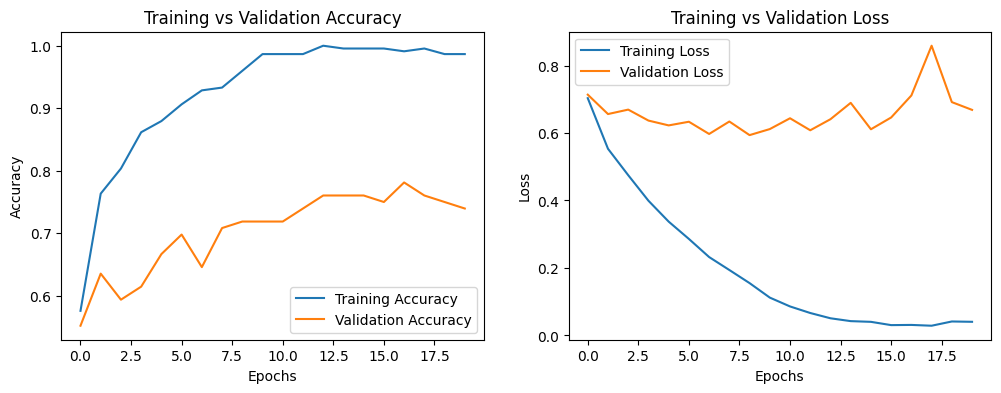

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def get_sequence_model():
    # Inputs: frame features and mask
    frame_features_input = keras.Input(
        shape=(MAX_SEQ_LENGTH, NUM_FEATURES), name="frame_features"
    )
    frame_mask_input = keras.Input(
        shape=(MAX_SEQ_LENGTH,), dtype=tf.bool, name="frame_mask"
    )

    # Use the mask input explicitly in the LSTM
    x = layers.Masking()(frame_features_input)
    x = layers.LSTM(256)(x, mask=frame_mask_input)

    # Dense layers
    x = layers.Dense(128, activation="relu")(x)
    output = layers.Dense(len(label_processor.get_vocabulary()), activation="softmax")(x)

    # Build a connected two-input model
    model = keras.Model(
        inputs=[frame_features_input, frame_mask_input],
        outputs=output
    )

    # Compile
    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=keras.optimizers.Adam(learning_rate=1e-4),
        metrics=["accuracy"]
    )
    return model


# 1. Run experiment and capture history
history, sequence_model = run_experiment()

# 2. Plot accuracy and loss
import matplotlib.pyplot as plt

train_acc = history.history.get("accuracy")
val_acc = history.history.get("val_accuracy")
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(train_acc, label="Training Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")

# Loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")

plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Classification Report:

              precision    recall  f1-score   support

        Real       0.77      0.82      0.79        44
    Deepfake       0.76      0.69      0.72        36

    accuracy                           0.76        80
   macro avg       0.76      0.76      0.76        80
weighted avg       0.76      0.76      0.76        80



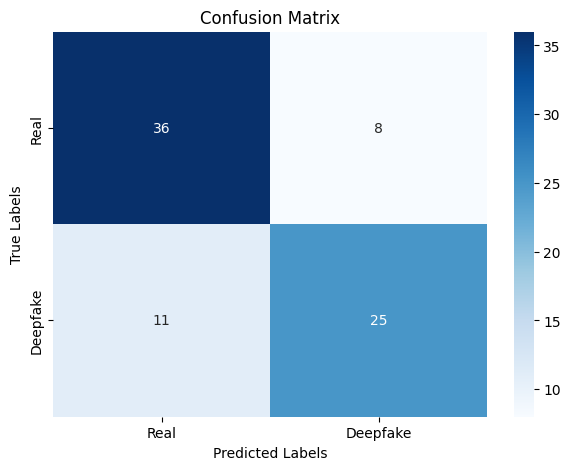

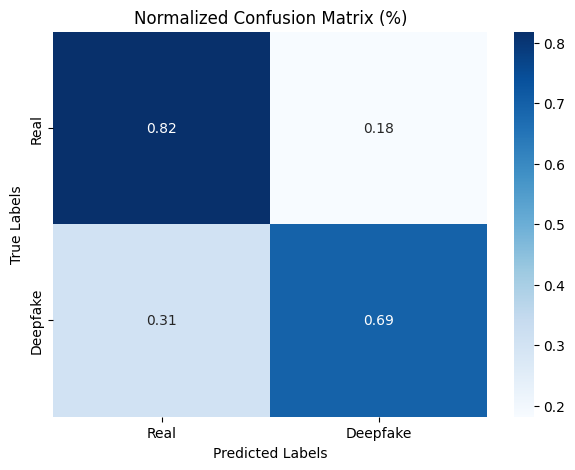

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 1. Predictions
test_predictions = sequence_model.predict([test_data[0], test_data[1]])
predicted_labels = np.argmax(test_predictions, axis=-1)

# 2. Classification Report
print("Classification Report:\n")
print(classification_report(test_labels, predicted_labels, target_names=["Real", "Deepfake"]))

# 3. Confusion Matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)
class_names = ["Real", "Deepfake"]

# --- Standard Confusion Matrix ---
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# --- Normalized Confusion Matrix (Percentages) ---
conf_matrix_norm = conf_matrix.astype("float") / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix_norm, annot=True, fmt=".2f", cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Normalized Confusion Matrix (%)")
plt.show()


Test video path: /content/drive/MyDrive/SET_PROJECT-1/FF++/real/04__walk_down_hall_angry.mp4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step

Prediction results for: /content/drive/MyDrive/SET_PROJECT-1/FF++/real/04__walk_down_hall_angry.mp4
  real: 

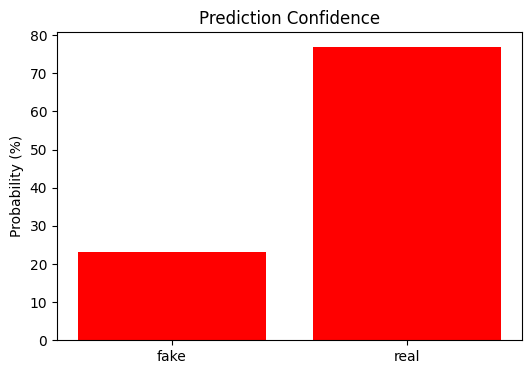

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

def prepare_single_video(frames):
    frames = frames[None, ...]
    frame_mask = np.zeros(shape=(1, MAX_SEQ_LENGTH,), dtype="bool")
    frame_features = np.zeros(shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32")

    for i, batch in enumerate(frames):
        video_length = batch.shape[0]
        length = min(MAX_SEQ_LENGTH, video_length)
        for j in range(length):
            frame_features[i, j, :] = feature_extractor.predict(batch[None, j, :])
        frame_mask[i, :length] = 1  # 1 = not masked, 0 = masked

    return frame_features, frame_mask


def sequence_prediction(path, show_plot=True):
    class_vocab = label_processor.get_vocabulary()

    # Load frames from video
    frames = load_video(os.path.join("test", path))
    frame_features, frame_mask = prepare_single_video(frames)

    # Predict probabilities
    probabilities = sequence_model.predict([frame_features, frame_mask])[0]

    # Print results nicely
    print(f"\nPrediction results for: {path}")
    for i in np.argsort(probabilities)[::-1]:
        print(f"  {class_vocab[i]}: {probabilities[i] * 100:5.2f}%")

    # Optional: Bar plot of class probabilities
    if show_plot:
        plt.figure(figsize=(6, 4))
        plt.bar(class_vocab, probabilities * 100, color=['green' if c=="Real" else 'red' for c in class_vocab])
        plt.ylabel("Probability (%)")
        plt.title("Prediction Confidence")
        plt.show()

    return frames


# Pick a random test video
test_video = np.random.choice(test_df["video_path"].values.tolist())
print(f"Test video path: {test_video}")

# Run prediction
test_frames = sequence_prediction(test_video)


Predicting on the real sample video:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

Prediction results for: /content/drive/MyDrive/SET_PROJECT-1/FF++/real/05__kitchen_still.mp4
  real: 89.21%
  fake: 10.79%
✅ Predicted Class: real



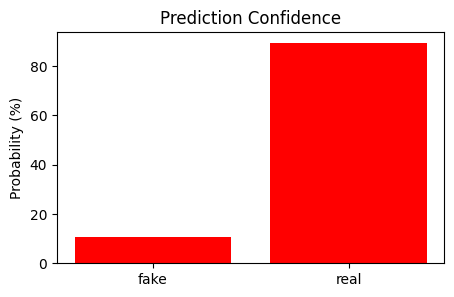

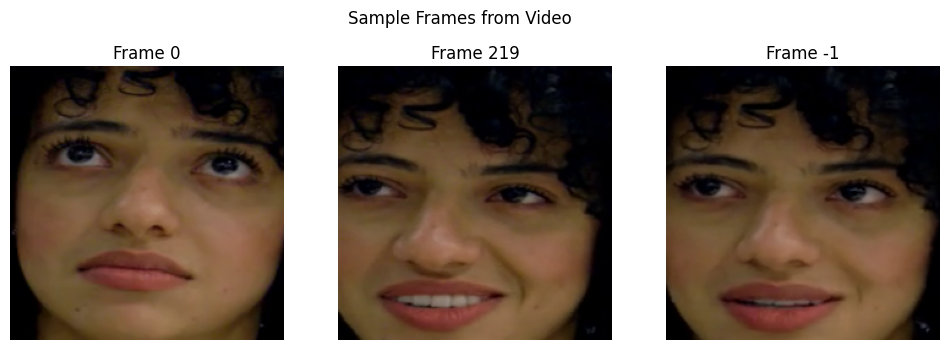


Predicting on the fake sample video:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

Prediction results for: /content/drive/MyDrive/SET_PROJECT-1/FF++/fake/10_22__kitchen_pan__EHARPYBT.mp4
  fake: 90.18%
  real:  9.82%
✅ Predicted Class: fake



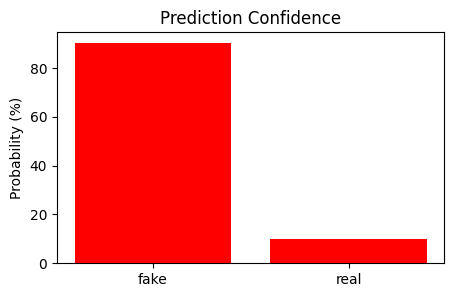

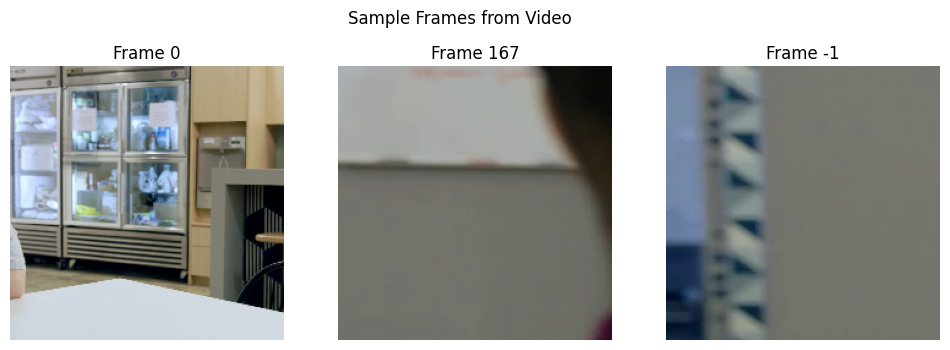

In [ ]:
import matplotlib.pyplot as plt

def sequence_prediction(video_path, show_plot=True, show_frames=True):
    class_vocab = label_processor.get_vocabulary()
    frames = load_video(video_path)
    frame_features, frame_mask = prepare_single_video(frames)

    probabilities = sequence_model.predict([frame_features, frame_mask])[0]

    # Print results
    print(f"\nPrediction results for: {video_path}")
    for i in np.argsort(probabilities)[::-1]:
        print(f"  {class_vocab[i]}: {probabilities[i] * 100:5.2f}%")

    top_class = class_vocab[np.argmax(probabilities)]
    print(f"✅ Predicted Class: {top_class}\n")

    # Probability bar plot
    if show_plot:
        plt.figure(figsize=(5, 3))
        plt.bar(class_vocab, probabilities * 100, color=['green' if c=="Real" else 'red' for c in class_vocab])
        plt.ylabel("Probability (%)")
        plt.title("Prediction Confidence")
        plt.show()

    # Display sample frames
    if show_frames and len(frames) > 0:
        idxs = [0, len(frames)//2, -1]  # first, middle, last
        plt.figure(figsize=(12, 4))
        for i, idx in enumerate(idxs):
            plt.subplot(1, 3, i+1)
            plt.imshow(frames[idx].astype("uint8"))
            plt.axis("off")
            plt.title(f"Frame {idx}")
        plt.suptitle("Sample Frames from Video")
        plt.show()

    return frames


# Test prediction
real_sample_path = "/content/drive/MyDrive/SET_PROJECT-1/FF++/real/05__kitchen_still.mp4"
fake_sample_path = "/content/drive/MyDrive/SET_PROJECT-1/FF++/fake/10_22__kitchen_pan__EHARPYBT.mp4"

print("Predicting on the real sample video:")
test_frames_real = sequence_prediction(real_sample_path)

print("\nPredicting on the fake sample video:")
test_frames_fake = sequence_prediction(fake_sample_path)


In [ ]:
# Load the vocabulary
vocabulary2 = np.load('/content/drive/MyDrive/SET_PROJECT-2/label_processor_vocabulary.npy', allow_pickle=True)

# Recreate the StringLookup layer using the loaded vocabulary
label_processor2 = keras.layers.StringLookup(num_oov_indices=0, vocabulary=vocabulary2.tolist())
print(label_processor2.get_vocabulary())

[np.str_('fake'), np.str_('real')]


In [ ]:
# Save the model in HDF5 format
sequence_model.save("/content/drive/MyDrive/SET_PROJECT-2/deepfake_video.h5")
print("Model saved successfully at /kaggle/working/deepfake_video.h5")

Model saved successfully at /kaggle/working/deepfake_video.h5


In [ ]:
import keras
import numpy as np

# Load the full model (architecture + weights)
deepfake_model = keras.models.load_model('/content/drive/MyDrive/SET_PROJECT-2/deepfake_video.h5')
print("✅ Deepfake detection model loaded successfully!")

# --- Helper function to prepare a single video ---
def prepare_single_video(frames):
    frames = frames[None, ...]
    frame_mask = np.zeros(shape=(1, MAX_SEQ_LENGTH,), dtype="bool")
    frame_features = np.zeros(shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32")

    for i, batch in enumerate(frames):
        video_length = batch.shape[0]
        length = min(MAX_SEQ_LENGTH, video_length)
        for j in range(length):
            # Extract features for each frame
            frame_features[i, j, :] = feature_extractor.predict(batch[None, j, :], verbose=0)
        frame_mask[i, :length] = 1  # Mark valid frames

    return frame_features, frame_mask


# --- Prediction function using the loaded model ---
def sequence_prediction(video_path):
    class_vocab = label_processor2.get_vocabulary()

    # Load frames from video
    frames = load_video(video_path)
    frame_features, frame_mask = prepare_single_video(frames)

    # Predict with loaded deepfake model
    probabilities = deepfake_model.predict([frame_features, frame_mask], verbose=0)[0]

    # Print probabilities in descending order
    print(f"\n🎥 Results for video: {video_path}")
    for i in np.argsort(probabilities)[::-1]:
        print(f"  {class_vocab[i]}: {probabilities[i] * 100:5.2f}%")

    return frames


# --- Test on sample videos ---
real_sample_path = "/content/drive/MyDrive/SET_PROJECT-1/FF++/real/14__exit_phone_room.mp4"
fake_sample_path = "/content/drive/MyDrive/SET_PROJECT-1/FF++/fake/07_03__walking_outside_cafe_disgusted__F0YYEA5W.mp4"

print("🔍 Predicting on the REAL sample video:")
test_frames_real = sequence_prediction(real_sample_path)

print("\n🔍 Predicting on the FAKE sample video:")
test_frames_fake = sequence_prediction(fake_sample_path)


✅ Deepfake detection model loaded successfully!
🔍 Predicting on the REAL sample video:

🎥 Results for video: /content/drive/MyDrive/SET_PROJECT-1/FF++/real/14__exit_phone_room.mp4
  real: 85.27%
  fake: 14.73%

🔍 Predicting on the FAKE sample video:

🎥 Results for video: /content/drive/MyDrive/SET_PROJECT-1/FF++/fake/07_03__walking_outside_cafe_disgusted__F0YYEA5W.mp4
  fake: 86.73%
  real: 13.27%


In [ ]:
# Load the vocabulary
vocabulary2 = np.load('/content/drive/MyDrive/SET_PROJECT-2/label_processor_vocabulary.npy', allow_pickle=True)

# Recreate the StringLookup layer using the loaded vocabulary
label_processor2 = keras.layers.StringLookup(num_oov_indices=0, vocabulary=vocabulary2.tolist())
print(label_processor2.get_vocabulary())

[np.str_('fake'), np.str_('real')]


In [ ]:
!pip install tqdm tensorflow_docs mtcnn imutils imageio

In [ ]:
import os
import pandas as pd
import cv2 as cv
import numpy as np
import tensorflow as tf
from tqdm import tqdm
from mtcnn import MTCNN
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow_docs.vis import embed
from tensorflow import keras
from imutils import paths

import imageio

In [ ]:
import keras
import numpy as np
import cv2 as cv
detector = MTCNN()

IMG_SIZE = 224
BATCH_SIZE = 64
EPOCHS = 100

MAX_SEQ_LENGTH = 20
NUM_FEATURES = 2048

# Load the full model (architecture + weights)
deepfake_model = keras.models.load_model('/content/drive/MyDrive/SET_PROJECT-2/deepfake_video.h5')

# Load the vocabulary
vocabulary2 = np.load('/content/drive/MyDrive/SET_PROJECT-2/label_processor_vocabulary.npy', allow_pickle=True)

# Recreate the StringLookup layer using the loaded vocabulary
label_processor2 = keras.layers.StringLookup(num_oov_indices=0, vocabulary=vocabulary2.tolist())

# Feature extractor function
def build_feature_extractor2():
    feature_extractor = keras.applications.InceptionV3(
        weights="imagenet",
        include_top=False,
        pooling="avg",
        input_shape=(IMG_SIZE, IMG_SIZE, 3),
    )
    preprocess_input = keras.applications.inception_v3.preprocess_input

    inputs = keras.Input((IMG_SIZE, IMG_SIZE, 3))
    preprocessed = preprocess_input(inputs)

    outputs = feature_extractor(preprocessed)
    return keras.Model(inputs, outputs, name="feature_extractor")

# Instantiate the feature extractor
feature_extractor1 = build_feature_extractor2()

# Prepare video frames for feature extraction
def prepare_single_video(frames):
    frames = frames[None, ...]
    frame_mask = np.zeros(shape=(1, MAX_SEQ_LENGTH,), dtype="bool")
    frame_features = np.zeros(shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32")

    for i, batch in enumerate(frames):
        video_length = batch.shape[0]
        length = min(MAX_SEQ_LENGTH, video_length)
        for j in range(length):
            frame_features[i, j, :] = feature_extractor1.predict(batch[None, j, :])
        frame_mask[i, :length] = 1  # 1 = not masked, 0 = masked

    return frame_features, frame_mask

# Sequence prediction using the model
def sequence_prediction(video_path):
    class_vocab = label_processor2.get_vocabulary()

    # Load the video frames from the given path (you will need to implement this function)
    frames = load_video(video_path)
    frame_features, frame_mask = prepare_single_video(frames)

    # Predict using the loaded deepfake model
    probabilities = deepfake_model.predict([frame_features, frame_mask])[0]

    # Output the prediction probabilities for each class
    for i in np.argsort(probabilities)[::-1]:
        print(f"  {class_vocab[i]}: {probabilities[i] * 100:5.2f}%")

    return frames

def load_video(path, max_frames=0, resize=(IMG_SIZE, IMG_SIZE), skip_frames=2):
    cap = cv.VideoCapture(path)
    frames = []
    frame_count = 0
    previous_box = None

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if frame_count % skip_frames == 0:
            frame, previous_box = get_face_region_first_frame(frame, previous_box)
            frame = cv.resize(frame, resize)
            frame = frame[:, :, [2, 1, 0]]  # BGR to RGB
            frames.append(frame)

            if len(frames) == max_frames:
                break
        frame_count += 1

    while len(frames) < max_frames and frames:
        frames.append(frames[-1])

    cap.release()
    return np.array(frames)

# Face region extraction
def get_face_region_first_frame(frame, previous_box=None):
    if previous_box is None:
        # Detect the face only if no previous bounding box is provided
        detections = detector.detect_faces(frame)
        if detections:
            x, y, width, height = detections[0]['box']
            previous_box = (x, y, width, height)
        else:
            return crop_center_square(frame), None  # fallback to center crop if no face detected
    else:
        x, y, width, height = previous_box

    face_region = frame[y:y+height, x:x+width]
    return face_region, previous_box

# Test prediction on real and fake sample videos
real_sample_path = "/content/drive/MyDrive/SET_PROJECT-2/01_03__talking_angry_couch__ISF9SP4G.mp4"
fake_sample_path = "/content/drive/MyDrive/SET_PROJECT-1/FF++/fake/07_03__walking_outside_cafe_disgusted__F0YYEA5W.mp4"

print("Predicting on the real sample video:")
test_frames_real = sequence_prediction(real_sample_path)

print("\nPredicting on the fake sample video:")
test_frames_fake = sequence_prediction(fake_sample_path)

Predicting on the real sample video:
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
  fake: 73.63%
  real: 26.37%

Predicting on the fake sample video:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━